In [1]:
# librarie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# importation de données

data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


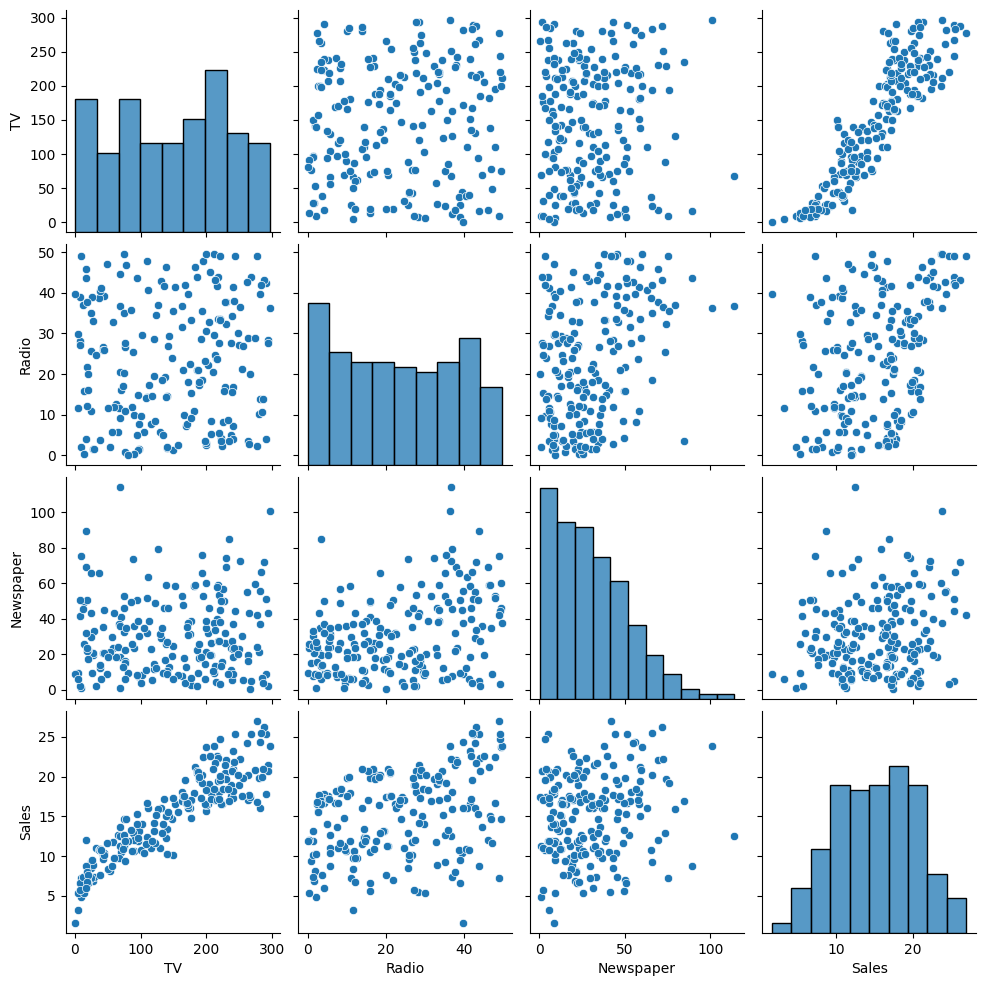

In [5]:
# Distribution data

sns.pairplot(data);

In [6]:
# Verification de données dupliquée

data.duplicated().sum()

0

In [7]:
# Sommes données manquantes

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Statistiques

data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# corelation entre les variables

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


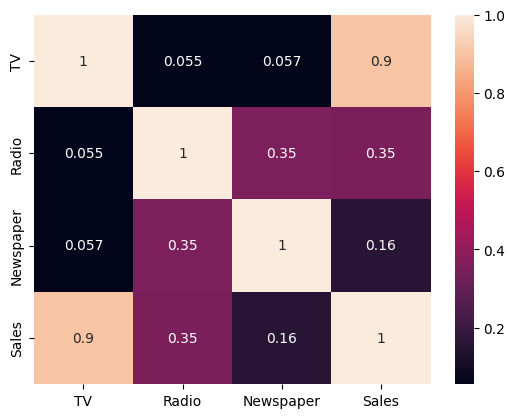

In [10]:
# matrice correlation

sns.heatmap(data.corr(), annot=True);

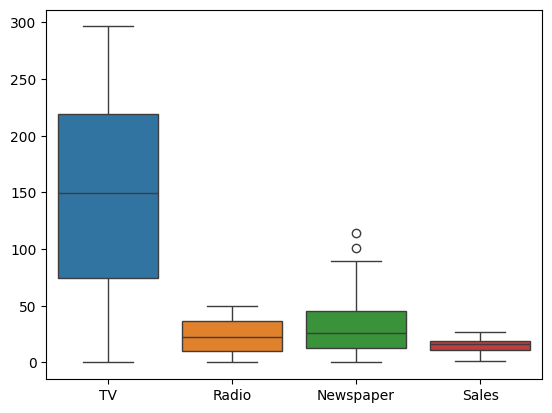

In [11]:
# Boxplot de données

sns.boxplot(data=data);

In [14]:
# Counte valeurs sible

data['Sales'].value_counts().sum()

200

In [15]:
# separation de données

X = data.drop('Sales', axis=1)
y = data['Sales']

In [16]:
# Disivion des données

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Taille de données d'entrainnement et de test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [22]:
# Importation du modelLineaire

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Les metrics

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [26]:
mean_absolute_error(y_test, y_pred)


1.2748262109549338

In [58]:
model.score(X_train, y_train)

0.9001416005862131

In [24]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9059011844150826


In [31]:
# Importance de données dans la prediction

var_imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
var_imp = var_imp.sort_values(by='Importance', ascending=False)
print(var_imp)

     Feature  Importance
1      Radio    0.100945
0         TV    0.054509
2  Newspaper    0.004337


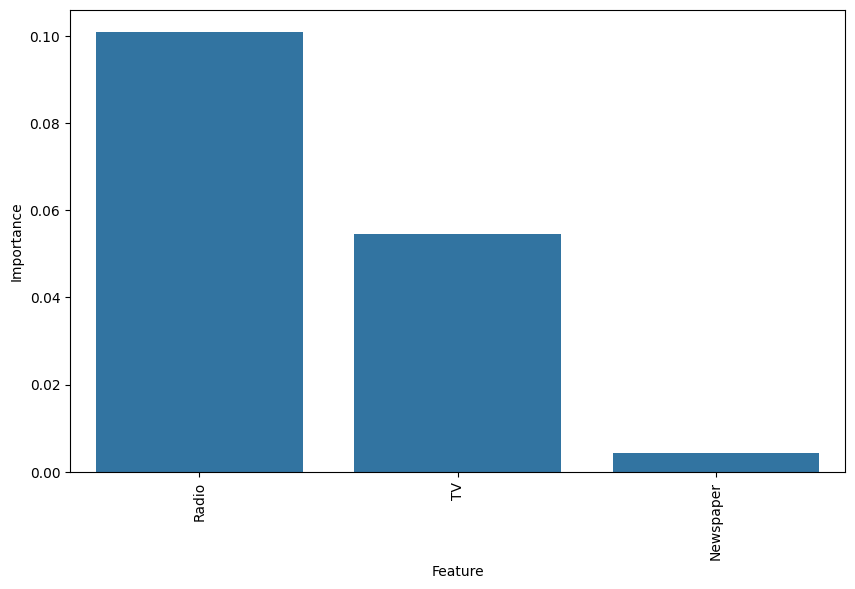

In [32]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=var_imp)
plt.xticks(rotation=90)
plt.show()

In [59]:
pente = model.coef_[0]
ordonne = model.intercept_

print("Pente:", pente)
print("Ordonnée:", ordonne)

Pente: 0.05450927083721978
Ordonnée: 4.714126402214127


In [44]:
px.scatter(data, x='TV', y='Sales', trendline='ols')

In [45]:
px.scatter(data, x='Radio', y='Sales', trendline='ols')

In [46]:
px.scatter(data, x='Newspaper', y='Sales', trendline='ols')

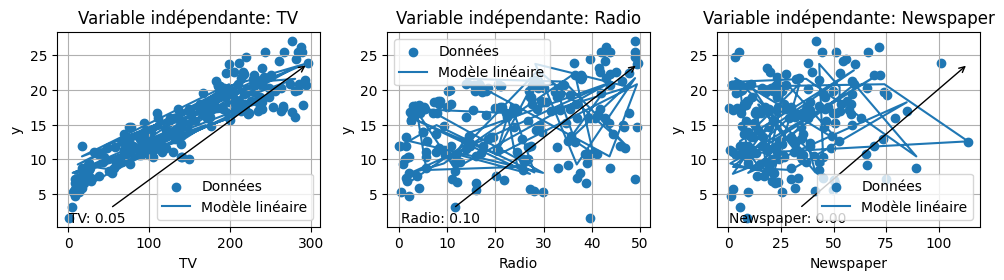

In [64]:
plt.figure(figsize=(10, 5))  # Ajuster la taille du graphique si nécessaire

# Créer le scatter plot pour chaque variable indépendante
for i, col in enumerate(X.columns):
    plt.subplot(2, len(X.columns), i + 1)  # Disposition des sous-graphiques
    plt.scatter(X[col], y, label='Données')
    plt.plot(X_test[col], y_pred, label='Modèle linéaire')

    # Ajouter l'annotation du coefficient pour chaque variable
    plt.annotate(f"{col}: {model.coef_[i]:.2f}", xy=(max(X[col]), max(y_pred)),
                 xytext=(0.5, 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

    plt.xlabel(col)
    plt.ylabel('y')
    plt.title(f"Variable indépendante: {col}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajuster la disposition des sous-graphiques
plt.show()


In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [67]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [68]:
y_pred = svr_model.predict(X_test)

In [69]:
svr_model.score(X_train, y_train)

0.8700505681364318

In [70]:
accuracy = svr_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.886764963148391


In [71]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.886764963148391


In [73]:
svr_model.score(X_train, y_train)

0.8700505681364318

In [76]:
import joblib
joblib.dump(svr_model, 'svr_model.pkl')

['svr_model.pkl']

In [77]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [78]:
loaded_model = joblib.load('model.pkl')

In [79]:
loaded_model.score(X_train, y_train)

0.9001416005862131

In [80]:
new_data = pd.DataFrame({
    'TV': [100],
    'Radio': [50],
    'Newspaper': [20]
})
new_data.head()

,TV,Radio,Newspaper
0,100,50,20


In [81]:
loaded_model.predict(new_data)

array([15.29905454])